In [29]:
# 1. Import Libraries - goest to
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import pytest

import library_final
from library_final.pokedex import DataLoader as ld
from library_final.pokedex import DataPreprocessor as nc
from library_final.pokedex import FeatureEng as en
from library_final.pokedex import EDA as ea


class DataProcessor:
    def __init__(self, df):
        self.df = df
        pd.set_option('display.float_format', lambda x: '{:.1f}'.format(x) if x % 1 else '{:.0f}'.format(x))

class MissingDataVisualizer(DataProcessor):
    def visualize_missing_data(self):
            missing_percentages_df = (self.df.isnull().mean() * 100).round(2).reset_index()
            missing_percentages_df.columns = ['Column Name', 'Percentage Missing']

            # Convert 'Column Name' to string type
            missing_percentages_df['Column Name'] = missing_percentages_df['Column Name'].astype(str)

            plt.figure(figsize=(20, 9))
            plt.bar(missing_percentages_df['Column Name'], missing_percentages_df['Percentage Missing'], color='skyblue')
            plt.xlabel('Column Name')
            plt.ylabel('Percentage Missing')
            plt.title('Percentage of Missing Values by Column')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout(pad=0.0001)
            plt.show()


class CorrelationMatrixVisualizer:
    def __init__(self, df):
        self.df = df

    def select_numerical_columns(self):
        self.numerical_columns = [col for col in self.df.select_dtypes(include='number').columns]

    def calculate_correlation_matrix(self):
        self.selected_df = self.df[self.numerical_columns]
        self.correlation_matrix = self.selected_df.corr()

    def plot_heatmap(self, figsize=(20, 16)):
        matrix = np.triu(self.correlation_matrix)
        plt.figure(figsize=figsize)
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, mask=matrix)
        plt.title("Correlation Matrix Heatmap (Numerical Variables Only)")
        plt.show()


class PokemonVisualizations:
    def __init__(self, df):
        self.df = df

    def box_plot_by_generation(self):
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=self.df, x='Generation', y='Victory_Rate')
        plt.title('Box Plot of Victory Rate by Generation')
        plt.xlabel('Generation')
        plt.ylabel('Victory Rate')
        plt.xticks(rotation=45)
        plt.show()

    def violin_plot_by_type_columns(self):
        type_columns = ['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy',
                        'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass',
                        'Ground', 'Ice', 'Normal', 'Poison', 'Psychic',
                        'Rock', 'Steel', 'Water']

        self.df['Type'] = self.df[type_columns].idxmax(axis=1)

        plt.figure(figsize=(12, 6))
        sns.violinplot(data=self.df, x='Type', y='Victory_Rate')
        plt.title('Violin Plot of Victory Rate by Type')
        plt.xlabel('Type')
        plt.ylabel('Victory Rate')
        plt.xticks(rotation=45)
        plt.show()

    def box_plot_legendary_vs_non_legendary(self):
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=self.df, x='Legendary', y='Victory_Rate')
        plt.title('Box Plot of Victory Rate for Legendary vs. Non-Legendary Pokemon')
        plt.xlabel('Legendary')
        plt.ylabel('Victory Rate')
        plt.xticks([0, 1], ['Non-Legendary', 'Legendary'])
        plt.show()

    def compare_victory_rate_legendary_vs_non_legendary(self):
        mean_victory_rate_legendary = self.df[self.df['Legendary'] == 1]['Victory_Rate'].mean()
        mean_victory_rate_non_legendary = self.df[self.df['Legendary'] == 0]['Victory_Rate'].mean()

        print("Mean Victory Rate for Legendary Pokemon:", mean_victory_rate_legendary)
        print("Mean Victory Rate for Non-Legendary Pokemon:", mean_victory_rate_non_legendary)

In [2]:
loader = ld.loader_database()
combats_data, pokemon_data, pokemon_id_each_team, team_combat, ProcessedData = loader.load_datasets()

In [3]:

"""1. Load Data"""
# 4. Data Processing
battle_processor = nc.PokemonBattleProcessor(pokemon_data, combats_data)
battle_processor.process_battle_data()
df = battle_processor.get_processed_data()


In [4]:

"""2. New File EDA"""
# 5. Basic Data Checks and EDA
numeric_analyzer = ea.NumericDataAnalyzer(df)
numeric_stats = numeric_analyzer.calculate_statistics()
print(numeric_stats)


          Variable  Mean  Mode  Median  Standard Deviation  Minimum  Maximum  \
0                # 400.5     1   400.5               231.1        1      800   
1               HP  69.3    60      65                25.5        1      255   
2           Attack  79.0   100      75                32.5        5      190   
3          Defense  73.8    70      70                31.2        5      230   
4          Sp. Atk  72.8    60      65                32.7       10      194   
5          Sp. Def  71.9    80      70                27.8       20      230   
6            Speed  68.3    50      65                29.1        5      180   
7       Generation   3.3     1       3                 1.7        1        6   
8     Victory_Rate   0.5     0     0.5                 0.3        0      1.0   
9    Total_Battles   125   121     127                21.1        0      164   
10  Victory_Counts  62.5     0      61                33.9        0      152   

    Count   IQR  Skewness  Range  
0   

In [5]:

categorical_analyzer = ea.CategoricalDataAnalyzer(df)
categorical_stats = categorical_analyzer.calculate_statistics()
print(categorical_stats)


  Variable  Number of Unique Values  \
0     Name                      800   
1   Type 1                       18   
2   Type 2                       18   

                          Top 5 Most Frequent Values  
0  [Bulbasaur, Uxie, Mega Gallade, Probopass, Dus...  
1               [Water, Normal, Grass, Bug, Psychic]  
2        [Flying, Ground, Poison, Psychic, Fighting]  


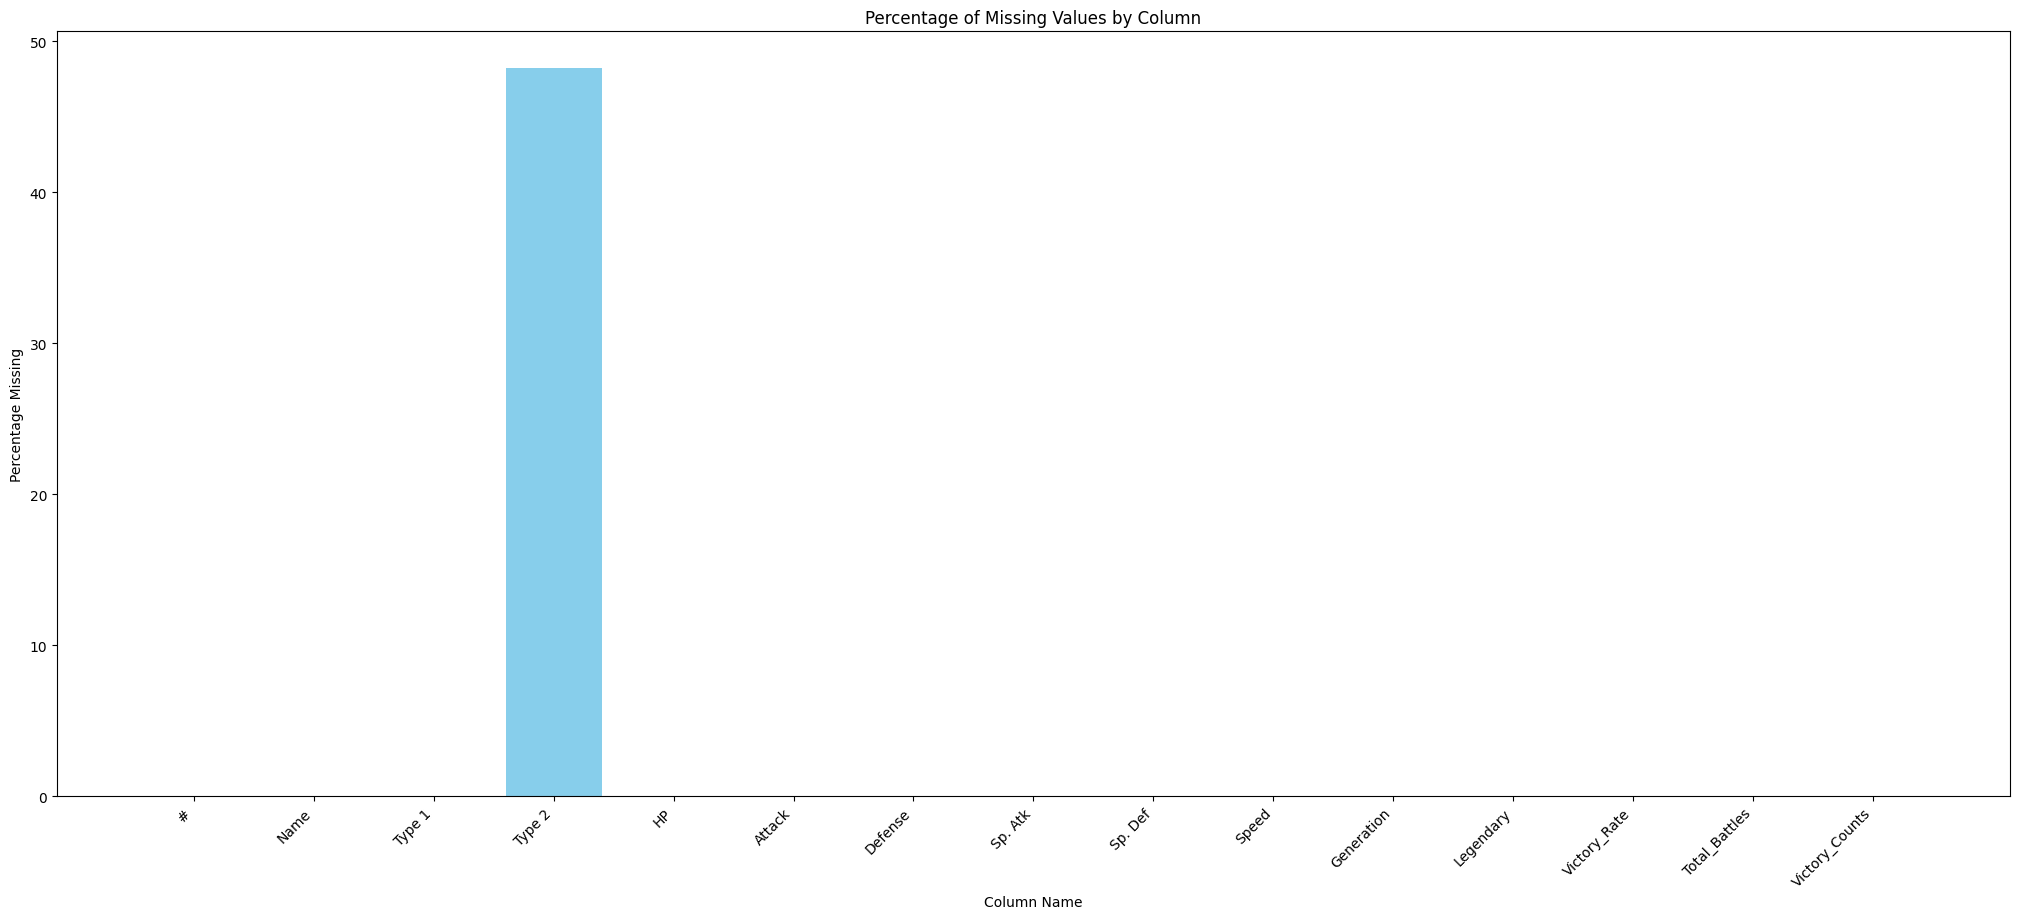

In [11]:
missing_data_visualizer = MissingDataVisualizer(df)
missing_data_visualizer.visualize_missing_data()


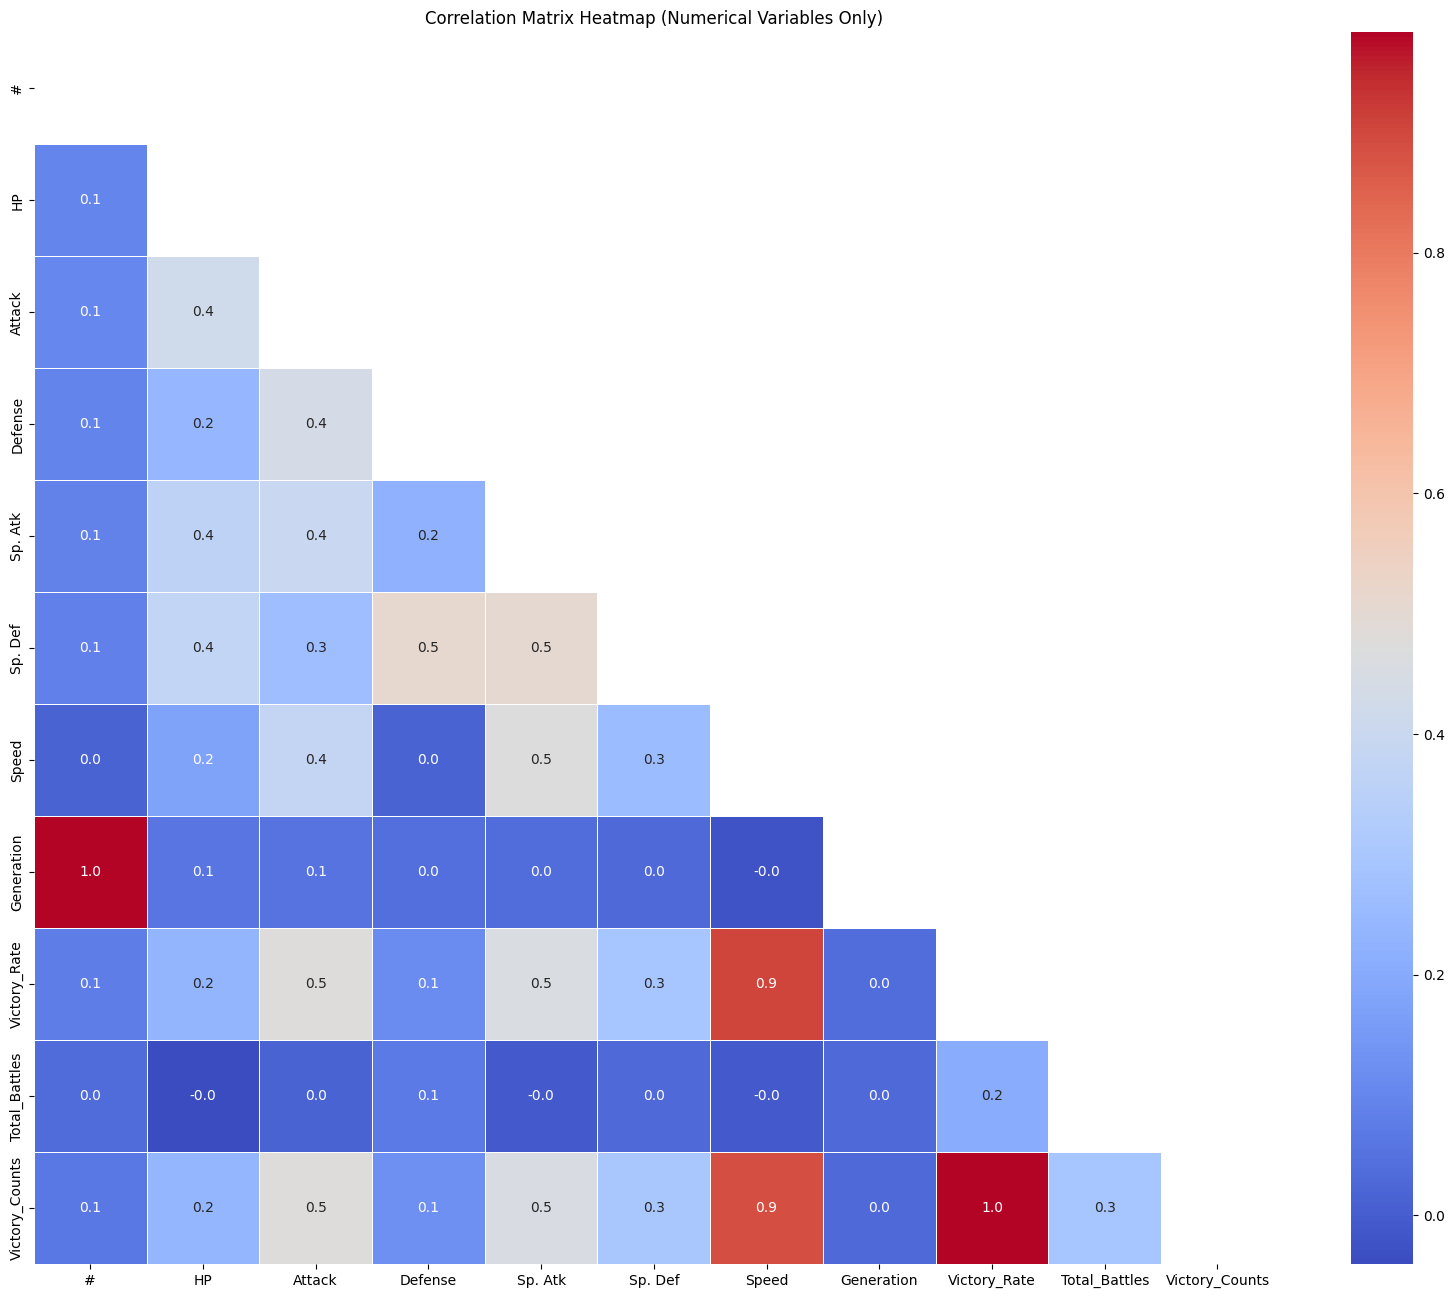

In [13]:

visualizer = CorrelationMatrixVisualizer(df)
visualizer.select_numerical_columns()
visualizer.calculate_correlation_matrix()
visualizer.plot_heatmap()

In [19]:

# 6. Feature Engineering
offensive_calculator = nc.OffensivePowerCalculator(df)
defensive_calculator = nc.DefensivePowerCalculator(df)
speed_power_ratio_calculator = nc.SpeedToPowerRatioCalculator(df)

offensive_calculator.calculate()
defensive_calculator.calculate()
speed_power_ratio_calculator.calculate()

type_encoder = en.PokemonTypeEncoder(df)
type_encoder.one_hot_encode_type1()
type_encoder.encode_type2()
df = type_encoder.get_updated_dataframe()

legendary_encoder = en.Pokemon_Dummy_Legendary_Encoder(df)
legendary_encoder.encode_legendary()


/Users/mikelgallo/repos/CDS_final_pokemon/library_final/pokedex/FeatureEng.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  self.pokemon_data.at[index, type2] = int(1)


In [20]:

""""Now it runs back the old EDA to make sure everything is fine"""
# 7. EDA Post Feature Engineering
numeric_analyzer = ea.NumericDataAnalyzer(df)
numeric_stats = numeric_analyzer.calculate_statistics()
print(numeric_stats)


                Variable  Mean  Mode  Median  Standard Deviation  Minimum  \
0                      # 400.5     1   400.5               231.1        1   
1                     HP  69.3    60      65                25.5        1   
2                 Attack  79.0   100      75                32.5        5   
3                Defense  73.8    70      70                31.2        5   
4                Sp. Atk  72.8    60      65                32.7       10   
5                Sp. Def  71.9    80      70                27.8       20   
6                  Speed  68.3    50      65                29.1        5   
7             Generation   3.3     1       3                 1.7        1   
8              Legendary   0.1     0       0                 0.3        0   
9           Victory_Rate   0.5     0     0.5                 0.3        0   
10         Total_Battles   125   121     127                21.1        0   
11        Victory_Counts  62.5     0      61                33.9        0   

In [21]:

categorical_analyzer = ea.CategoricalDataAnalyzer(df)
categorical_stats = categorical_analyzer.calculate_statistics()
print(categorical_stats)


  Variable  Number of Unique Values  \
0     Name                      800   
1   Type 1                       18   
2   Type 2                       18   

                          Top 5 Most Frequent Values  
0  [Bulbasaur, Uxie, Mega Gallade, Probopass, Dus...  
1               [Water, Normal, Grass, Bug, Psychic]  
2        [Flying, Ground, Poison, Psychic, Fighting]  


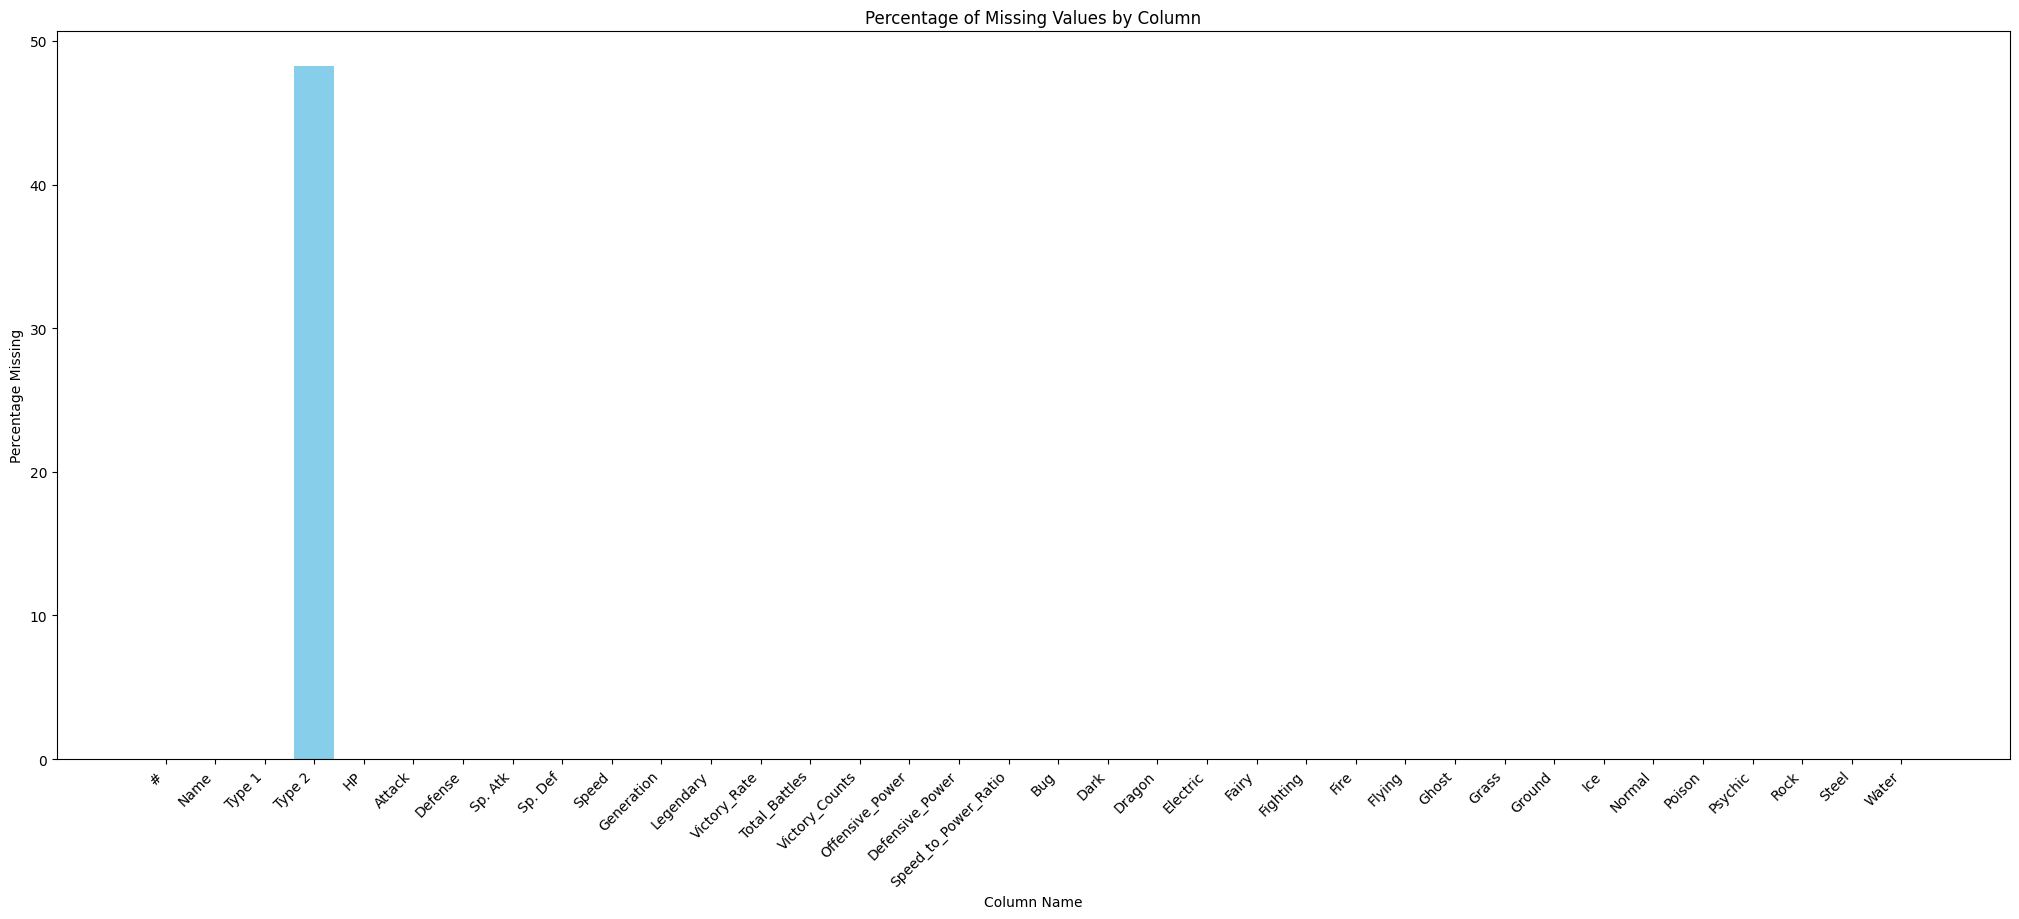

In [22]:

missing_data_visualizer = MissingDataVisualizer(df)
missing_data_visualizer.visualize_missing_data()


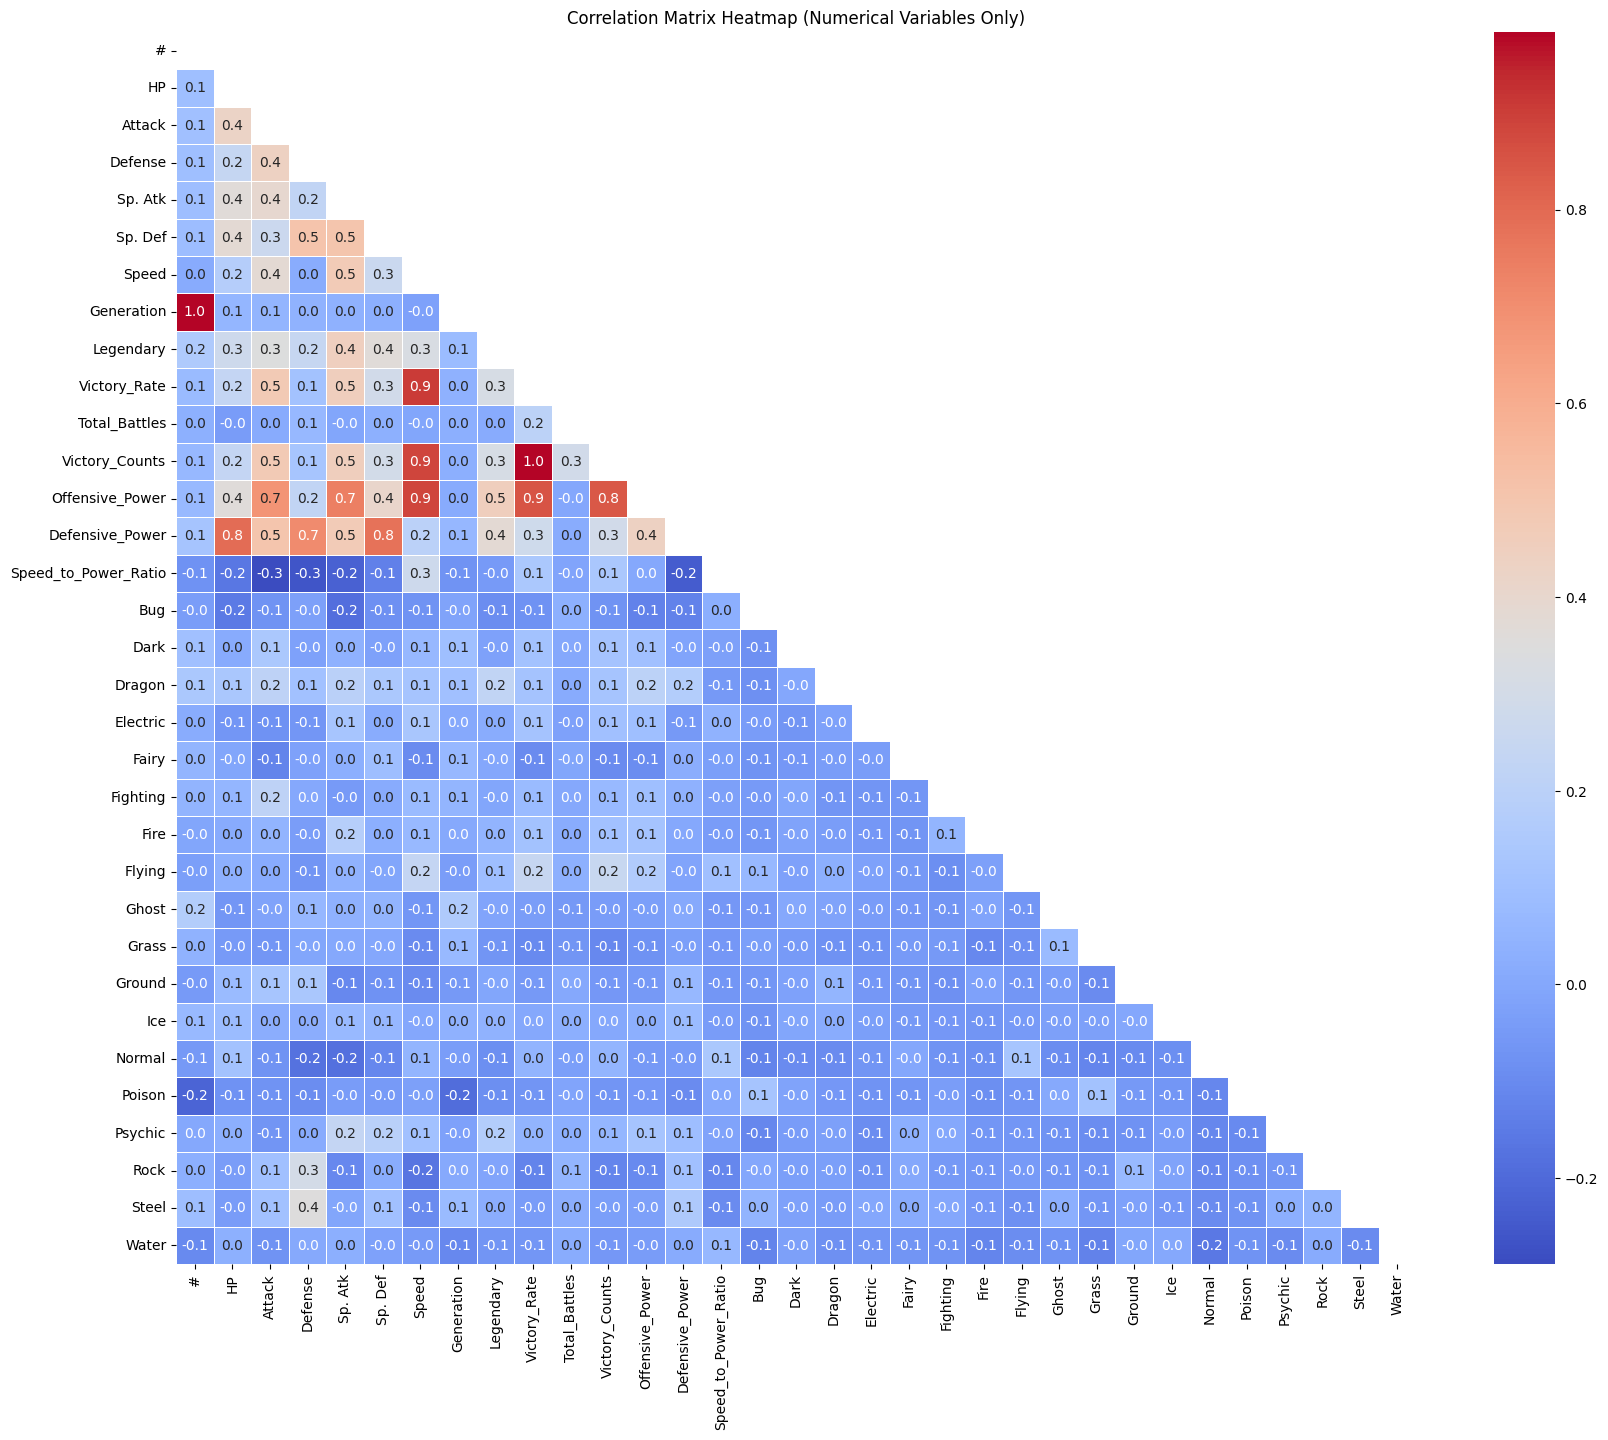

In [23]:

visualizer = CorrelationMatrixVisualizer(df)
visualizer.select_numerical_columns()
visualizer.calculate_correlation_matrix()
visualizer.plot_heatmap()


In [30]:

"""These are the new visualizations created post engineering"""
# 8. Additional Visualizations
pokemon_visualizations = PokemonVisualizations(df)


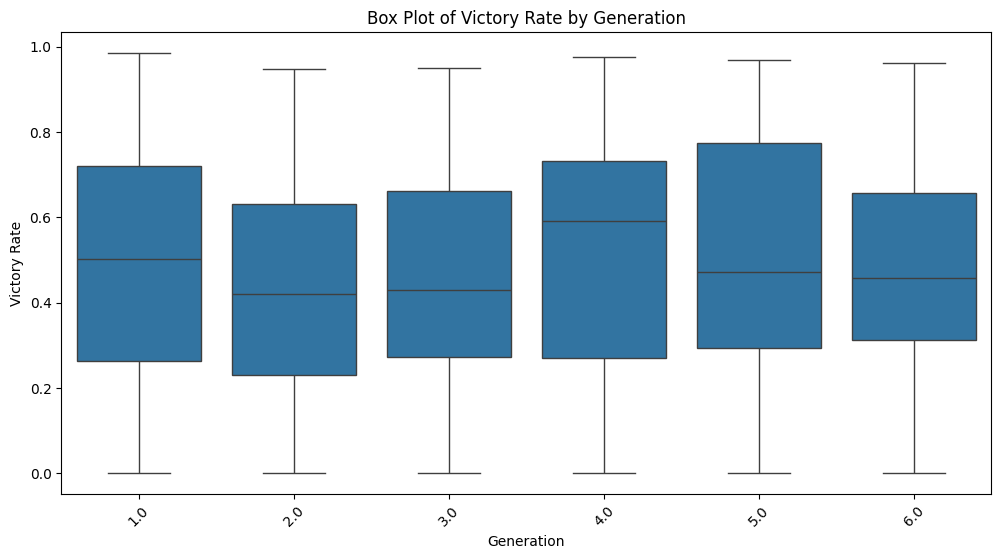

In [31]:

pokemon_visualizations.box_plot_by_generation()


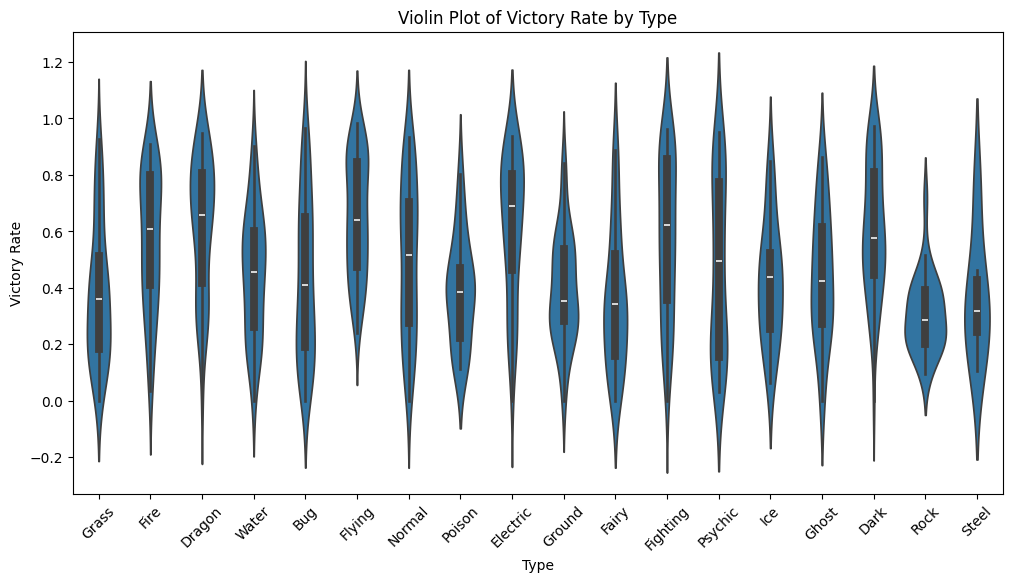

In [32]:

pokemon_visualizations.violin_plot_by_type_columns()


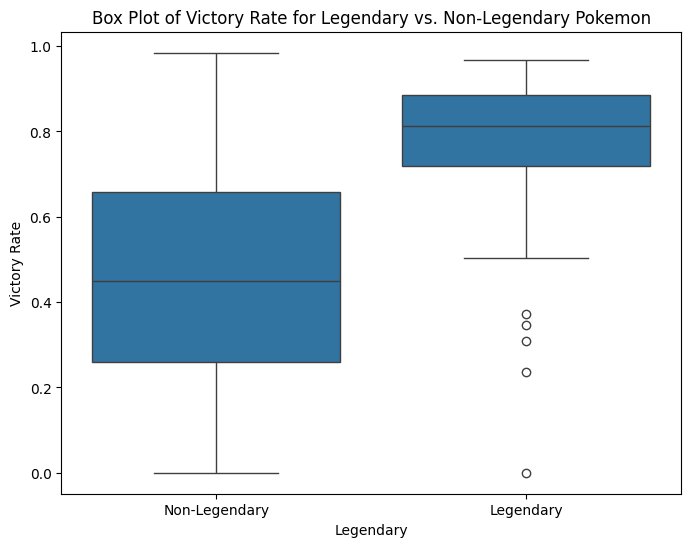

In [33]:

pokemon_visualizations.box_plot_legendary_vs_non_legendary()


In [34]:

pokemon_visualizations.compare_victory_rate_legendary_vs_non_legendary()

Mean Victory Rate for Legendary Pokemon: 0.7671498902560288
Mean Victory Rate for Non-Legendary Pokemon: 0.4664486224265733
